## Pytorch automatic differentiation

Differentiation is a fundamental operation in machine learning and deep learning, which are largely about optimization. PyTorch, a popular deep learning library, provides a powerful feature called automatic differentiation, which is used to compute the derivatives of tensors.

In PyTorch, tensors are a generalized version of vectors and matrices, and they can be operated on in the same way as NumPy arrays. However, unlike NumPy arrays, PyTorch tensors can keep track of a computational graph and gradients. This is particularly useful when we have complex models and want to compute gradients automatically.

When a tensor has its `requires_grad` attribute set to `True`, PyTorch will track all operations on the tensor. After the computation is finished, you can call `.backward()` and have all the gradients computed automatically. The gradient for a tensor will be accumulated into its `.grad` attribute.

This automatic differentiation feature makes PyTorch very handy for neural networks, where backpropagation requires computing gradients.

In [1]:
import torch
import torchviz

print(torch.__version__)

2.1.1+cu118


### Simple differentiation with PyTorch

In this section, we will see how to compute the derivative of a simple function using PyTorch. We will compute the derivative of the function $f(x) = 3x^2 + 2x + 1$ at $x = 2$.

Certainly, we can compute the derivative of this function by hand, which is $f'(x) = 6x + 2$. At $x = 2$, the derivative is $f'(2) = 14$.

However, we will use PyTorch to compute the derivative of this function.

In [2]:
# Define a scalar tensor
x = torch.tensor(2.0, requires_grad=True)

# Define a function
y = 3 * x ** 2 + 2 * x + 1

In [3]:
# Compute gradients
y.backward()

In [4]:
# Print out the gradients
print(x.grad)

tensor(14.)


The computation graph of this function is shown below (remember to install the `graphviz` package):

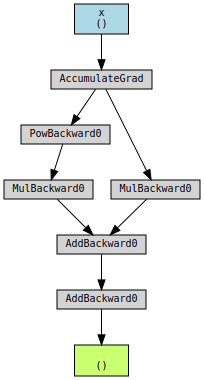

In [6]:
# Visualize the computational graph
dot = torchviz.make_dot(y, params={"x": x})
dot

### Multiple differentiation with PyTorch

In this section, we will see how to compute the derivative of a more complex function using PyTorch. We will compute the derivative of the function $z = 3y^2 + 2y + 1$, where $y = 2x + 1$ and $x = 2$.

Certainly, we can compute the derivative of this function by hand, which is:

$z'(x) = z'(y) \cdot y'(x) = (6y + 2) \cdot 2 = (6(2x + 1) + 2) \cdot 2 = (12x + 8) \cdot 2 = 24x + 16$

At $x = 2$, the derivative is $z'(2) = 64$.

However, we will use PyTorch to compute the derivative of this function.

In [7]:
# Define a tensor x
x = torch.tensor(2.0, requires_grad=True)

# Define a tensor y
y = 2 * x + 1

# Define a tensor z
z = 3 * y ** 2 + 2 * y + 1

In [8]:
# Take the derivative with respect to x
z.backward()

In [9]:
# Print out the gradients
print(x.grad)

tensor(64.)


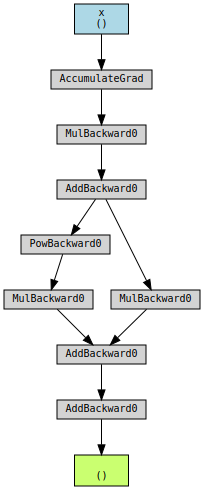

In [10]:
# Visualize the computational graph
dot = torchviz.make_dot(z, {'x': x})
dot

The autograd feature in PyTorch is a powerful tool for building and training neural networks. It allows for automatic computation of gradients, which is essential for optimization algorithms like stochastic gradient descent used in training neural networks.

By keeping track of the computational graph of operations, autograd eliminates the need for manual backpropagation. This not only simplifies the code but also reduces the chance of errors.

Moreover, autograd is designed to be flexible and can handle dynamic computational graphs, making it suitable for complex models and even recurrent neural networks with varying lengths of input data.

In conclusion, autograd is a key feature in PyTorch that makes the development and training of neural networks more efficient and less error-prone.